
**Name: Sparsh Saxena** <BR>
**Registration No.: 21BCE6015** <BR>
**Slot: L57+L58** <BR>
**Lab 7 Assignment** <BR>
**Machine Learning Lab** <BR>
**Submitted to: Ms. R.Jothi** <br>
**Colab Link:** https://colab.research.google.com/drive/1FFFQDImTuGGpnTg_Y0GB9w7eY1WjAYWT#scrollTo=Tj_FzCATkOwz

# **Question:** <br>

You are asked to design a classifier model for predicting the class of emotions in music using characteristics of the audio signal such as Mel Frequency Cepstral Coefficients (MFCCs), Tempo, Chromagram, Spectral and Harmonic features. Use the pre-processed dataset music.csv. There are four classes of emotions in the dataset: happy, sad, angry, relax.

<br> a. Use Support vector machine (SVM) for classification (use scikit).
<br> b. Print confusion matrix and report Accuracy, precision, F1 score and recall.
<br> c. Apply any pre-processing techniques and report if results are improving.
<br> d. Compare results of SVM with neural network. Report results.

# <b> Importing Libraries

In [77]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler,StandardScaler
warnings.simplefilter("ignore")

# <b> Data Preprocessing

In [78]:
# Read the dataset

df = pd.DataFrame(pd.read_csv("music.csv"))

In [79]:
df.head(10)

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
5,relax,0.137,0.510,7.664,116.044,2.313,-0.082,0.365,0.033,-0.136,...,0.064,0.391,0.102,0.000,0.280,0.240,0.355,1.682,0.662,0.958
6,relax,0.123,0.533,7.483,136.444,4.572,1.171,0.939,0.358,0.024,...,0.000,1.000,0.000,0.143,0.210,0.174,0.193,2.691,0.691,0.966
7,relax,0.103,0.575,7.006,141.132,3.495,0.553,0.275,0.269,0.257,...,0.128,1.000,0.030,0.746,0.366,0.267,-0.061,0.585,0.711,0.965
8,relax,0.145,0.542,6.846,82.048,4.010,0.550,0.568,0.559,0.218,...,0.000,0.150,0.910,0.000,0.322,0.210,0.031,0.408,0.796,0.970
9,relax,0.129,0.618,8.668,93.020,2.318,0.744,0.537,-0.116,0.119,...,0.127,0.018,0.385,0.000,0.388,0.340,0.122,1.682,0.627,0.965


In [80]:
# Defining the target value after viewing the data

target = "Class"

In [81]:
# Checking for duplicates

df.duplicated().sum()

12

In [82]:
# Shape of dataset

df.shape

(400, 51)

In [83]:
# Removing duplicates

df.drop_duplicates(inplace=True)
df.shape # Changed shape

(388, 51)

In [84]:
# Checking null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           388 non-null    object 
 1   _RMSenergy_Mean                                 388 non-null    float64
 2   _Lowenergy_Mean                                 388 non-null    float64
 3   _Fluctuation_Mean                               388 non-null    float64
 4   _Tempo_Mean                                     388 non-null    float64
 5   _MFCC_Mean_1                                    388 non-null    float64
 6   _MFCC_Mean_2                                    388 non-null    float64
 7   _MFCC_Mean_3                                    388 non-null    float64
 8   _MFCC_Mean_4                                    388 non-null    float64
 9   _MFCC_Mean_5                               

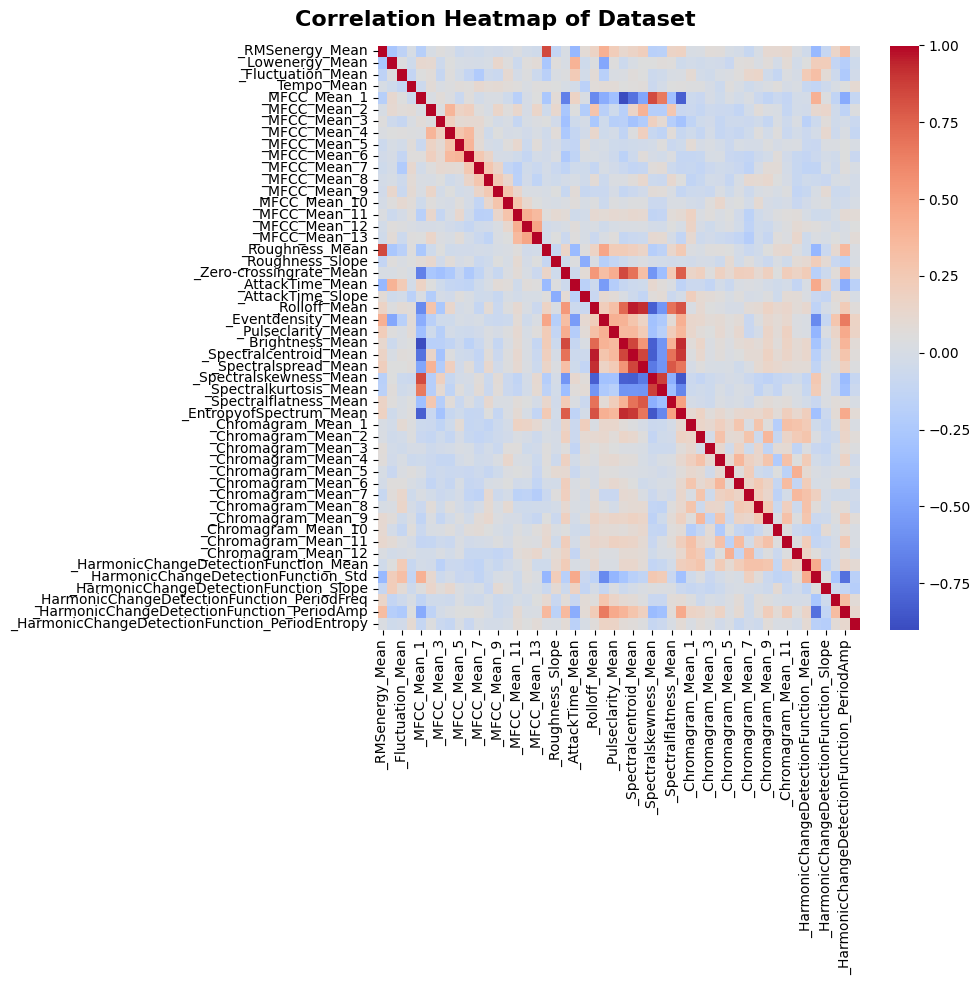

In [85]:
# Correlation heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.suptitle("Correlation Heatmap of Dataset", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Tried to remove redundant columns but only 3 such columns were found and
# their removal lead to a slight loss in accuracy, so retained them.

# <b> Model Training, Hyperparameter Tuning and Evaluation

In [86]:
# Train and Target Separations

X = df.drop(target,axis=1)
y = df[target]

In [87]:
# Checking for imbalance in count (no imbalance found almost equal for all classes)

df[target].value_counts()

sad      98
relax    97
angry    97
happy    96
Name: Class, dtype: int64

In [88]:
# Trying for simple SVC model first without further preprocessing (Accuracy is very less)

from sklearn.model_selection import train_test_split

X_train0,X_test0,y_train0,y_test0 = train_test_split(X,y,test_size=0.25,random_state=42)
model0 = SVC()
model0.fit(X_train0,y_train0)
print(f"Accuracy for simple SVC model: {round(accuracy_score(model0.predict(X_test0),y_test0)*100,2)} %")

Accuracy for simple SVC model: 39.18 %


In [89]:
# Finding the best SVC model using Hyperparameter Tuning and Normalization

scaler = MinMaxScaler()
X_trans1 = pd.DataFrame(scaler.fit_transform(X))
scaler = StandardScaler()
X_trans2 = pd.DataFrame(scaler.fit_transform(X))

for kern in ['linear','rbf','sigmoid','poly']:
  model = SVC(kernel = kern, tol = 0.001,gamma=1/55) # Found the other hyperparameter values through trial and error

  X_train1,X_test1,y_train1,y_test1 = train_test_split(X_trans1,y,test_size=0.25,random_state=42)
  model.fit(X_train1,y_train1)
  print(f"Accuracy for MinMaxScaler and {kern} kernel: {round(accuracy_score(model.predict(X_test1),y_test1)*100,2)} %")

  X_train2,X_test2,y_train2,y_test2 = train_test_split(X_trans2,y,test_size=0.25,random_state=42)
  model.fit(X_train2,y_train2)
  print(f"Accuracy for StandardScaler and {kern} kernel: {round(accuracy_score(model.predict(X_test2),y_test2)*100,2)} %")

  print()

Accuracy for MinMaxScaler and linear kernel: 72.16 %
Accuracy for StandardScaler and linear kernel: 73.2 %

Accuracy for MinMaxScaler and rbf kernel: 48.45 %
Accuracy for StandardScaler and rbf kernel: 80.41 %

Accuracy for MinMaxScaler and sigmoid kernel: 44.33 %
Accuracy for StandardScaler and sigmoid kernel: 75.26 %

Accuracy for MinMaxScaler and poly kernel: 19.59 %
Accuracy for StandardScaler and poly kernel: 50.52 %



In [90]:
# Hence we can see that the best model is when parameters are kernel='rbf', tol=0.001 and gamma = 1/55 and scaler is StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X_trans2,y,test_size=0.25,random_state=42)
model = SVC(kernel='rbf',tol=0.001,gamma=1/55)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Classification Report for the best obtained SVC model: \n")
print(classification_report(y_pred,y_test))

print(f"Accuracy: {round(accuracy_score(y_pred,y_test)*100,2)} %")

print(f"F1-Score: {round(f1_score(y_pred, y_test, average = 'macro')*100,2)} %")

print(f"Precision Score: {round(precision_score(y_pred,y_test, average = 'macro')*100,2)} %")

print(f"Recall Score: {round(recall_score(y_pred,y_test, average = 'macro')*100,2)} %")

Classification Report for the best obtained SVC model: 

              precision    recall  f1-score   support

       angry       0.86      0.95      0.90        20
       happy       0.88      0.91      0.89        23
       relax       0.78      0.83      0.81        30
         sad       0.68      0.54      0.60        24

    accuracy                           0.80        97
   macro avg       0.80      0.81      0.80        97
weighted avg       0.80      0.80      0.80        97

Accuracy: 80.41 %
F1-Score: 80.24 %
Precision Score: 80.1 %
Recall Score: 80.95 %


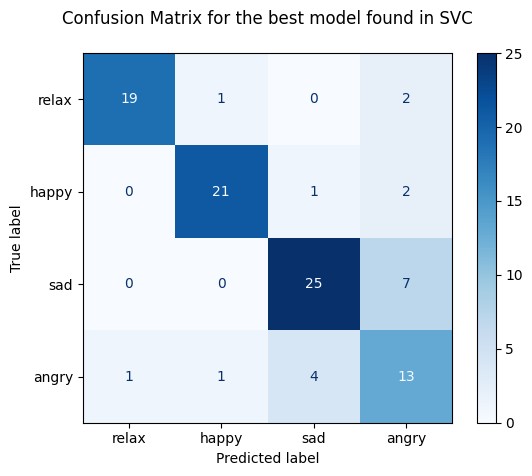

In [91]:
# Confusion Matrix for best SVC model obtained

disp = ConfusionMatrixDisplay.from_estimator(
      model,
      X_test,
      y_test,
      display_labels = df[target].unique(),
      cmap=plt.cm.Blues
)
title = f"Confusion Matrix for the best model found in SVC\n"
disp.ax_.set_title(title)
plt.show()

# <b> Multi Layer Perceptron Classifier for Comparision

In [92]:
# Comparison with neural network (Multi Layer Perceptron Classifier)

from sklearn.neural_network import MLPClassifier

X_train1,X_test1,y_train1,y_test1 = train_test_split(X_trans1,y,test_size=0.25,random_state=42)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_trans2,y,test_size=0.25,random_state=42)

# Hyperparameters tuned using trial and error
# Heuristic used for hidden layers: input_layers ~ no. of features + 1 and output_layers = no. of classes in target

model1 = MLPClassifier(hidden_layer_sizes=(52,4),activation="relu",solver="adam",max_iter=500,random_state=42)
model1.fit(X_train1,y_train1)

model2 = MLPClassifier(hidden_layer_sizes=(52,4),activation="relu",solver="adam",max_iter=500,random_state=42)
model2.fit(X_train2,y_train2)

y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)

print(f"Accuracy obtained for MinMaxScaler with MLP Classifier model is: {round(accuracy_score(y_pred1,y_test1)*100,2)} %\n")
print(f"Accuracy obtained for StandardScaler with MLP Classifier model is: {round(accuracy_score(y_pred2,y_test2)*100,2)} %")

Accuracy obtained for MinMaxScaler with MLP Classifier model is: 79.38 %

Accuracy obtained for StandardScaler with MLP Classifier model is: 71.13 %


In [93]:
# Evaluation for best MLP classifier model after hyperparameter tuning

print("Classification Report for best MLP Classifier model found using tuning \n(solver='adam',activation='relu',hidden_layer_sizes=(52,4) and max_iters = 500): \n")
print(classification_report(y_pred1,y_test1))
print()

print(f"Accuracy: {round(accuracy_score(y_pred1,y_test1)*100,2)} %")

print(f"F1-Score: {round(f1_score(y_pred1, y_test1, average = 'macro')*100,2)} %")

print(f"Precision Score: {round(precision_score(y_pred1,y_test1, average = 'macro')*100,2)} %")

print(f"Recall Score: {round(recall_score(y_pred1,y_test1, average = 'macro')*100,2)} %")

Classification Report for best MLP Classifier model found using tuning 
(solver='adam',activation='relu',hidden_layer_sizes=(52,4) and max_iters = 500): 

              precision    recall  f1-score   support

       angry       0.95      0.84      0.89        25
       happy       0.83      0.95      0.89        21
       relax       0.75      0.89      0.81        27
         sad       0.63      0.50      0.56        24

    accuracy                           0.79        97
   macro avg       0.79      0.80      0.79        97
weighted avg       0.79      0.79      0.79        97


Accuracy: 79.38 %
F1-Score: 78.86 %
Precision Score: 79.24 %
Recall Score: 79.53 %


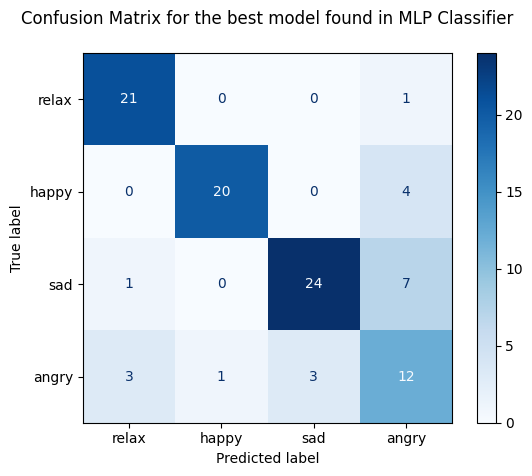

In [94]:
# Confusion Matrix for best MLP model obtained

disp = ConfusionMatrixDisplay.from_estimator(
      model1,
      X_test1,
      y_test1,
      display_labels = df[target].unique(),
      cmap=plt.cm.Blues
)
title = f"Confusion Matrix for the best model found in MLP Classifier\n"
disp.ax_.set_title(title)
plt.show()

Hence, we can see that after tuning, both the models perform similar on the dataset. <br> I obtained slightly better accuracy on SVC model though, after hyperparameter tuning. <br> Without tuning SVC performed pretty worse.